# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/fertility_Diagnosis - fertility_Diagnosis.csv (1).csv', sep=',')

In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 100
Total number of columns in dataset = 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         100 non-null    float64
 1   Age            100 non-null    float64
 2   Diseases       100 non-null    int64  
 3   Trauma         100 non-null    int64  
 4   Surgical       100 non-null    int64  
 5   Fevers         100 non-null    int64  
 6   Alcohol        100 non-null    float64
 7   Smoking        100 non-null    int64  
 8   SittingHours   100 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 7.2 KB


In [ ]:
df.head()

,Season,Age,Diseases,Trauma,Surgical,Fevers,Alcohol,Smoking,SittingHours
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [ ]:
target_col = "Fevers "

In [ ]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [ ]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [ ]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
results.params

const            0.808565
Season          -0.161484
Age              0.000327
Diseases         0.007820
Trauma          -0.145703
Surgical        -0.346710
Alcohol         -0.161039
Smoking          0.016523
SittingHours    -0.618912
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Fevers    R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.948
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0688
Time:                        19:50:38   Log-Likelihood:                -47.141
No. Observations:                  70   AIC:                             112.3
Df Residuals:                      61   BIC:                             132.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8086      0.689      1.174

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 0.8086

>b1 = -0.1615
>b2 = 0.0003
>b3 = 0.0078


2. Коэффициент детерминации R-squared = 0.203, его скорректированная оценка Adj. R-squared = 0.099 - это означает, что регрессионная модель объясняет 9.9% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 1.948

>расчетный уровень значимости Prob (F-statistic) = 0.0688

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b5 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b1, b2, b3, b4, b6, b7, b8, b9 превышает 0.05. Нулевая гипотеза не отвергается. b1, b2, b3, b4, b6, b7, b8, b9 не являются значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b9 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

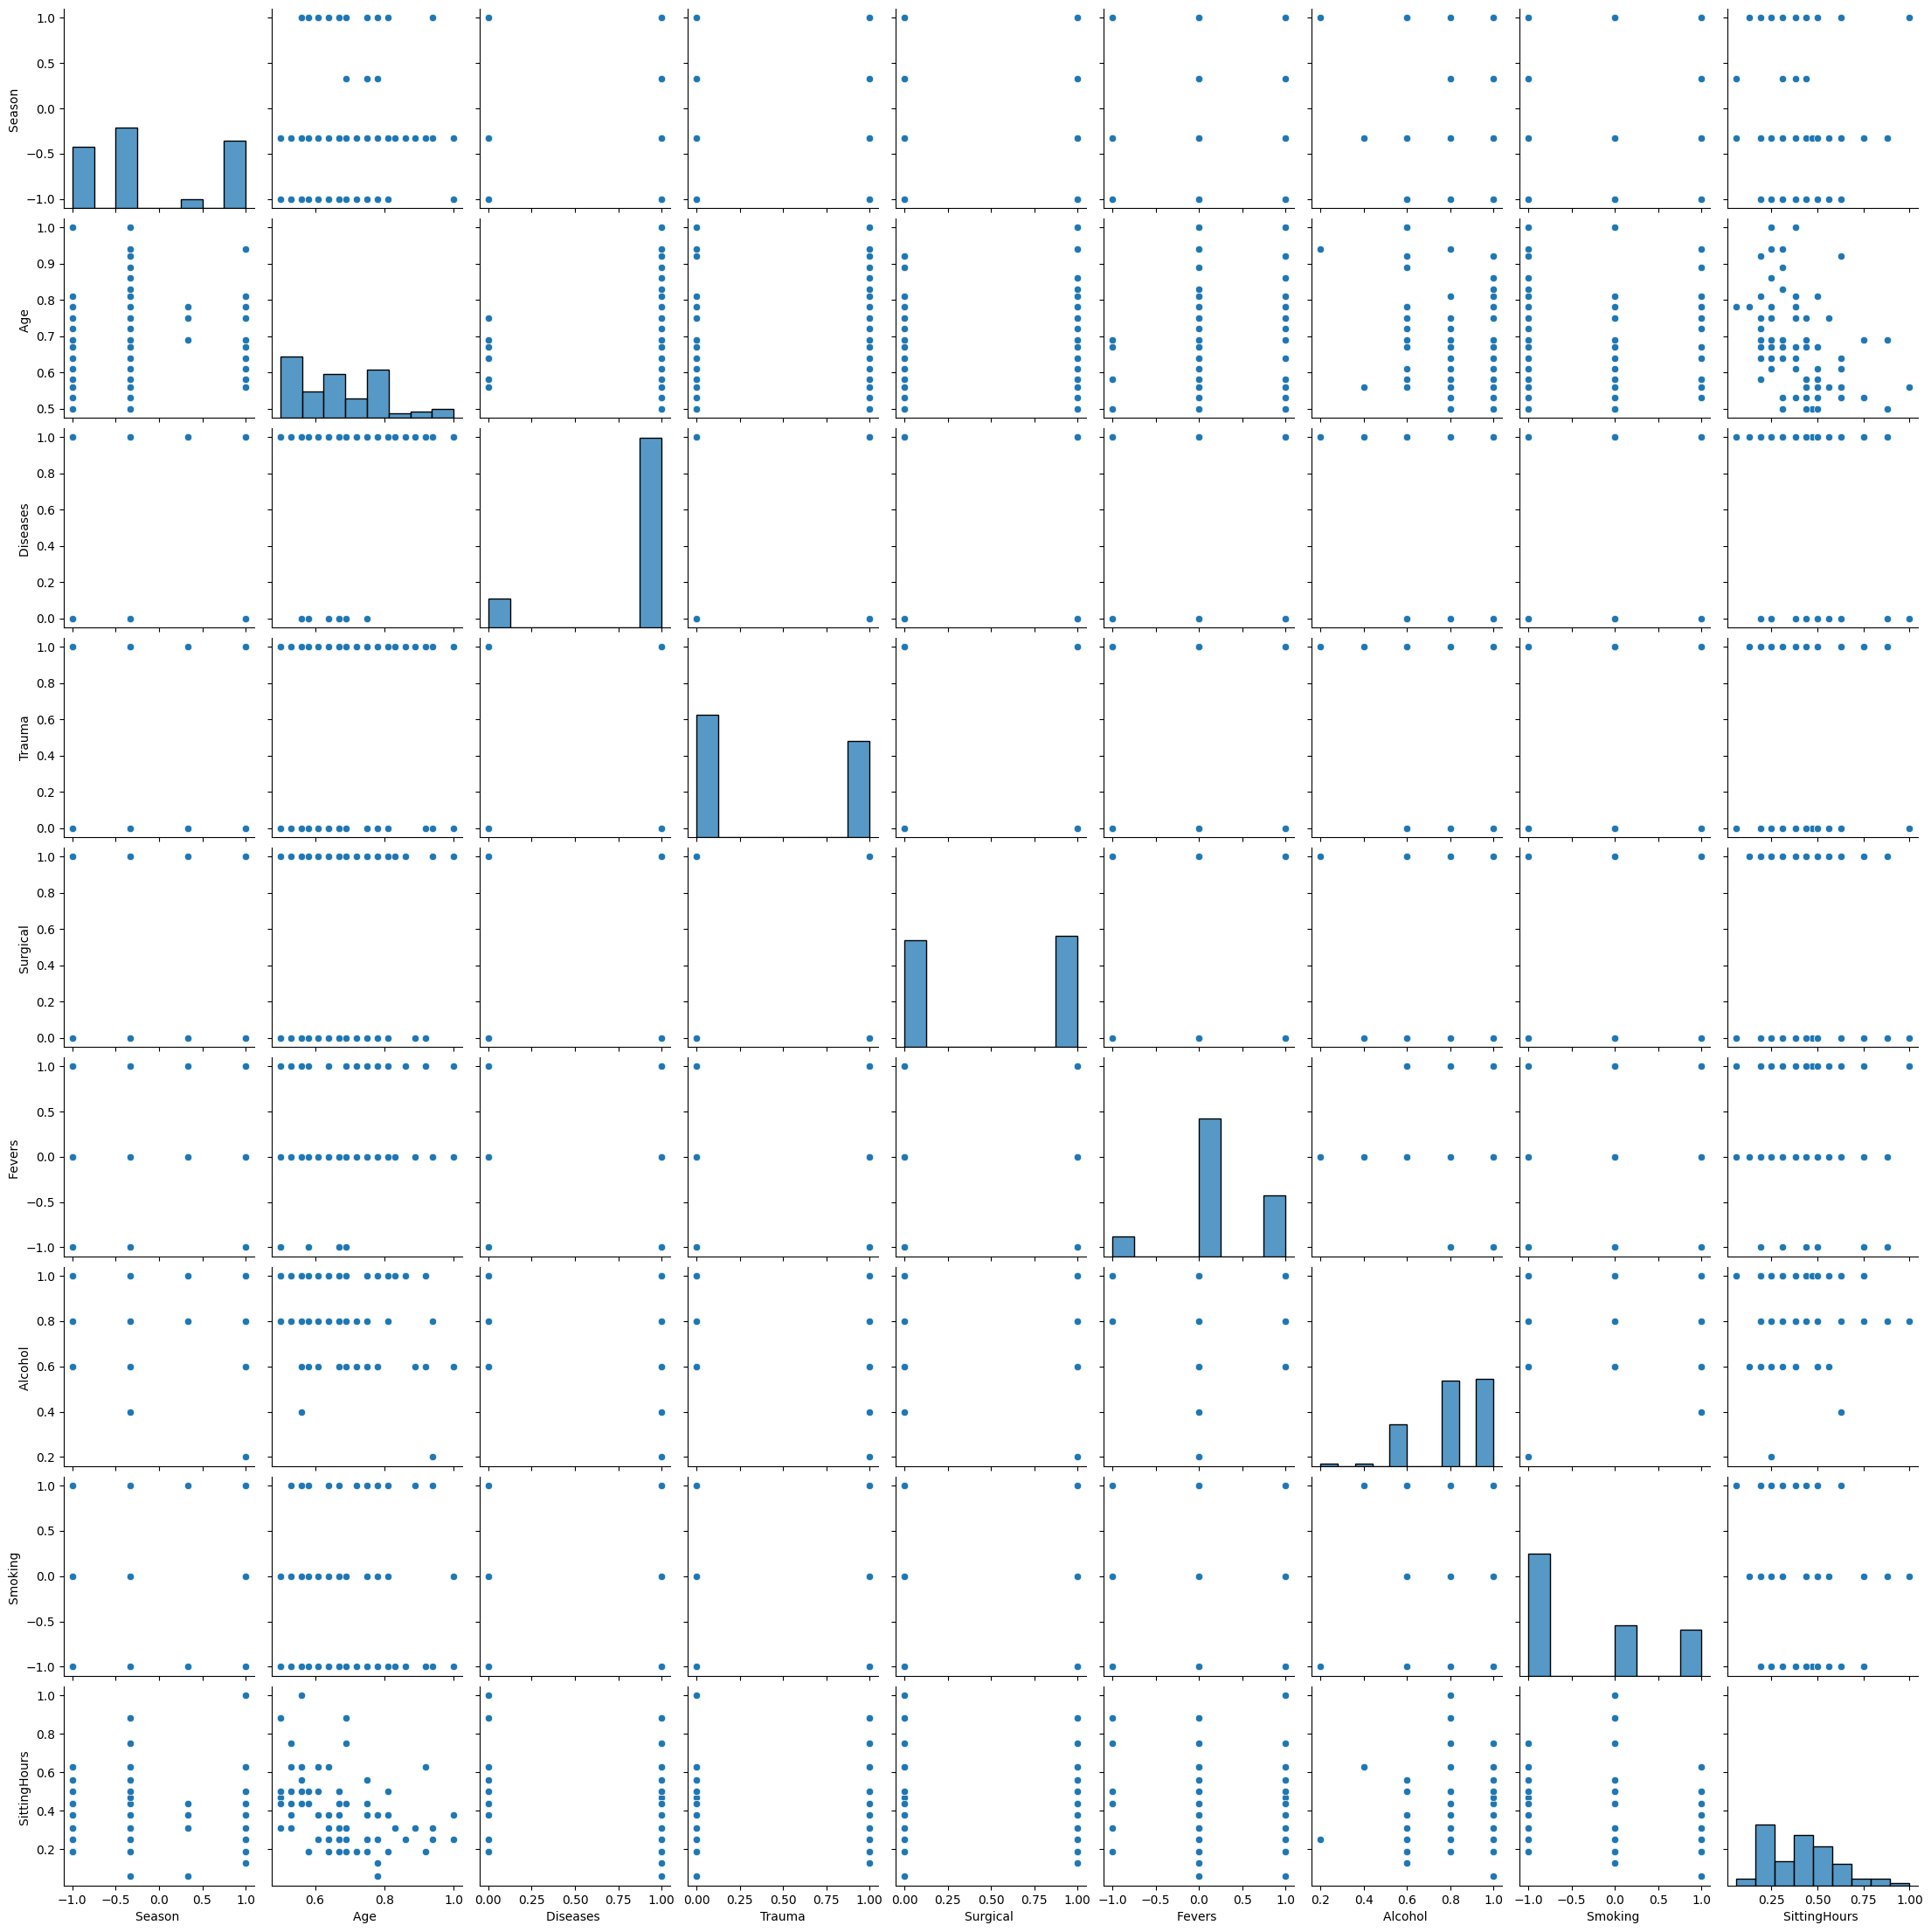

In [ ]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [ ]:
cols_num = ['Season ', 'Age ', 'Diseases ', 'Surgical ', 'Fevers ', 'Alcohol ', 'Smoking ', 'SittingHours ']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,Season,Age,Diseases,Surgical,Fevers,Alcohol,Smoking,SittingHours
Season,1.000000,0.065410,-0.176509,-0.006210,-0.221818,-0.041290,-0.028085,-0.019021
Age,0.065410,1.000000,0.080551,0.271945,0.120284,-0.247940,0.072581,-0.442452
Diseases,-0.176509,0.080551,1.000000,-0.140972,0.075645,0.038538,0.090535,-0.147761
Surgical,-0.006210,0.271945,-0.140972,1.000000,-0.231598,-0.075858,-0.053448,-0.192726
Fevers,-0.221818,0.120284,0.075645,-0.231598,1.000000,-0.000831,-0.007527,-0.151091
Alcohol,-0.041290,-0.247940,0.038538,-0.075858,-0.000831,1.000000,-0.184926,0.111371
Smoking,-0.028085,0.072581,0.090535,-0.053448,-0.007527,-0.184926,1.000000,-0.106007
SittingHours,-0.019021,-0.442452,-0.147761,-0.192726,-0.151091,0.111371,-0.106007,1.000000


<Axes: >

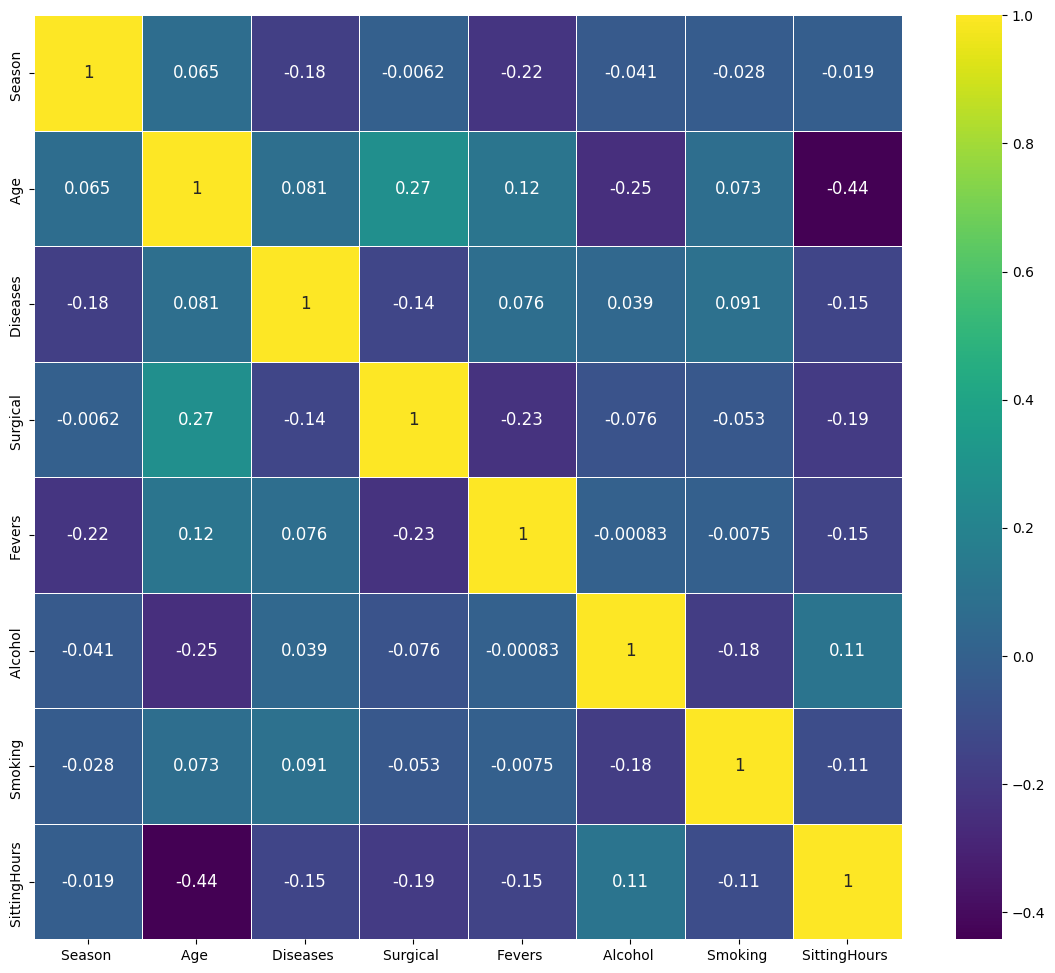

In [ ]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Не смотря на то, что атрибут Season на 6% объясняется атрибутом Age, удаление какого-либо из них не имеет смысла, так как приводит к тому, что регрессионная модель объясняет меньший процент вариации переменной Y, чем без удаления какого-либо из этих атрибутов.

In [ ]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Season,Age,Diseases,Trauma,Surgical,Alcohol,Smoking,SittingHours
vif,1.142466,16.505649,7.04058,2.150889,2.489693,18.424525,1.376082,6.004949


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

<Axes: ylabel='Density'>

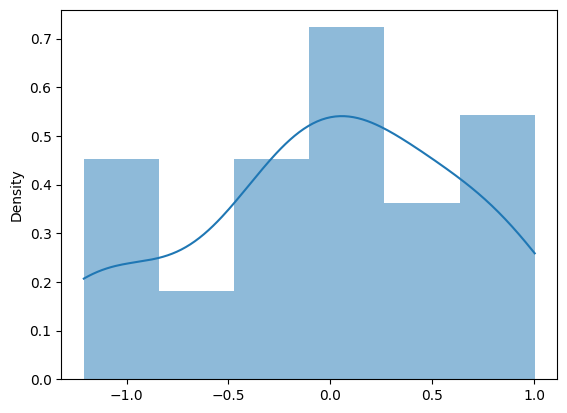

In [ ]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

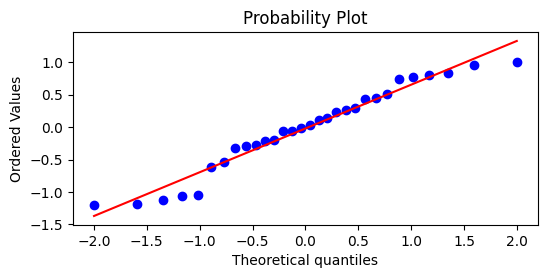

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
np.mean(residual)

-0.019517981674043394

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

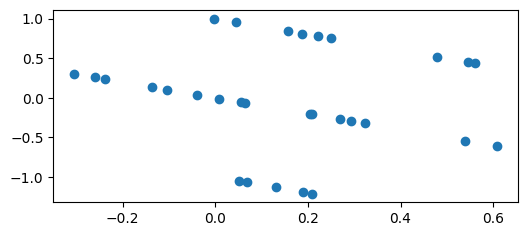

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

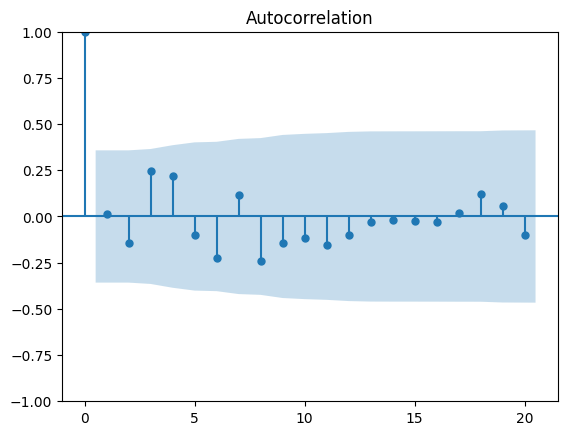

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=20 , alpha=0.05)
acf.show()


## Матрицами 

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [ ]:
from numpy.linalg import matrix_power
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)
b = (matrix_power(X_train.transpose().dot(X_train), -
1)).dot(X_train.transpose()).dot(y_train)
print('Matrix Coefficients: \n', b)
y_pred = np.dot(X_test, b.T)
print('Matrix Mean squared error: %.2f'
% mean_squared_error(y_test, y_pred))
print('Matrix Coefficient of determination: %.2f'
% r2_score(y_test, y_pred))

Matrix Coefficients: 
 [ 8.08564523e-01 -1.61484381e-01  3.26746743e-04  7.82027592e-03
 -1.45702965e-01 -3.46709755e-01 -1.61039212e-01  1.65227886e-02
 -6.18912487e-01]
Matrix Mean squared error: 0.43
Matrix Coefficient of determination: 0.05


## Градиентным спуском  

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df.loc[:, df.columns!=df.columns[-1]]
y = df.loc[:,df.columns[-1]]

# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

pipeline_ = Pipeline([('feature_scaling', StandardScaler()), ('sgd', SGDRegressor( max_iter=10000, early_stopping=True, eta0=0.1, tol=1e-9, validation_fraction=0.2, n_iter_no_change=10, average=20, random_state=42))])
pipeline_.fit(X_train,y_train)
pipeline_.steps[1][1].coef_

array([ 0.0079484 , -0.11800556, -0.02132542,  0.02951659, -0.02591159,
       -0.01646261, -0.01306479, -0.01691934])

In [ ]:
y_pred = pipeline_.predict(X_test)
y_pred[:10]

array([0.18932859, 0.51395885, 0.64263139, 0.46988182, 0.53052028,
       0.36788804, 0.48278881, 0.18351475, 0.49301399, 0.43390961])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

print(f'MSE: {mse}', f'MAE: {mae}', f'RMSE: {rmse}')
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

MSE: 0.03556566394990391 MAE: 0.14381828131496513 RMSE: 0.18858861033981852
Coefficient of determination: -0.14


Однако, при различии коэффициентов спрогнозированные значения, среднеквадратичная ошибка, средняя абсолютная ошибка, корень среднеквадратичной ошибки и коэффициент детерминации совпадают с тем, что было получено другими можелями.

# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей